#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=5703a8adcdd78cc5bce30e9058a0ab3a07e72cfa5fc9e73370a1a2b4fa160599
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built MiniSom


### Importing the libraries


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [10]:
dataset = pd.read_csv('Credit_Card_Applications.csv') # Statlog (Australian Credit Approval) Data Set
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [12]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


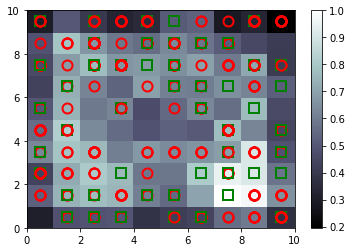

In [13]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [14]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(8,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [15]:
print(frauds)

[[1.5662854e+07 0.0000000e+00 2.9580000e+01 1.7500000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 1.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5745375e+07 0.0000000e+00 3.3080000e+01 1.6250000e+00 2.0000000e+00
  2.0000000e+00 4.0000000e+00 5.4000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5570508e+07 0.0000000e+00 5.1920000e+01 6.5000000e+00 2.0000000e+00
  3.0000000e+00 5.0000000e+00 3.0850000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 7.3000000e+01 1.0000000e+00]
 [1.5641733e+07 0.0000000e+00 5.0250000e+01 8.3500000e-01 2.0000000e+00
  6.0000000e+00 4.0000000e+00 5.0000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.4000000e+02 1.1800000e+02]
 [1.5660144e+07 0.0000000e+00 2.6170000e+01 2.0000000e+00 2.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 0.0000000e+00 0.

##Printing the Fraunch Clients

In [16]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15662854
15745375
15570508
15641733
15660144
15617991
15641007
15813718
15815271
15805627
15789865
15757933
15810716


##Part2 - Going from Unsupervised to Supervised Deep Learning

#Creating the Matrix of features

In [17]:
customers = dataset.iloc[:, 1:].values

#Creating the Dependent variable

In [18]:
is_fraud = np.zeros(len(dataset))

In [19]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [20]:
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

In [21]:
print(is_fraud)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

#Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Part 2 - Building the ANN

### Initializing the ANN

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
classifier = Sequential()

### Adding the input layer and the first hidden layer

In [38]:
classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

### Adding the output layer

In [39]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [40]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the ANN on the Training set

In [41]:
classifier.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 2s 1ms/step - loss: 0.4800 - accuracy: 0.9768
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.1813 - accuracy: 0.9812


#Predict the probabilities of fraud

In [42]:
y_pred = classifier.predict(customers)

22/22 [==============================] - 0s 2ms/step


In [43]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [44]:
print(y_pred)

[[1.57761560e+07 9.89237800e-02]
 [1.57395480e+07 6.16948642e-02]
 [1.56628540e+07 1.72660768e-01]
 ...
 [1.56754500e+07 2.31983718e-02]
 [1.57764940e+07 1.66401397e-02]
 [1.55924120e+07 2.43009534e-02]]


In [45]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [46]:
print(y_pred)

[[1.57938960e+07 1.22027919e-02]
 [1.56471910e+07 1.44194933e-02]
 [1.57176290e+07 1.44200819e-02]
 ...
 [1.56737470e+07 2.13254184e-01]
 [1.56389830e+07 2.20736519e-01]
 [1.56430560e+07 2.23123983e-01]]
